## Advanced Experiments: What to use
--------------------------------------------

Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following statistical questions. 

In [19]:
# Import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind, kruskal, wilcoxon, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

%matplotlib inline

In [2]:
# Load the dataset:
data = pd.read_csv("ESSdata_Thinkful.csv")

# Decode data based on codebook for ease of intepretation:
data['year'] = data['year'].map({6: 2012, 7: 2014})
data['gndr'] = data['gndr'].map({1: 'Male', 2: 'Female'})
data['partner'] = data['partner'].map({1: 'Together', 2: 'Alone'})
data['cntry'] = data['cntry'].map({'CH': 'Switzerland',
                                'CZ': 'Czech Republic',
                                'DE': 'Denmark',
                                'ES': 'Spain',
                                'NO': 'Norway',
                                'SE': 'Sweden'})

In [3]:
# Print out the first 5 rows of dataset:
data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,Switzerland,5.0,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,Female,60.0,Together
1,Switzerland,25.0,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,Female,59.0,Together
2,Switzerland,26.0,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,Male,24.0,Alone
3,Switzerland,28.0,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,Female,64.0,Together
4,Switzerland,29.0,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,Female,55.0,Together


In [4]:
# Inspect column datatype and missing values:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null object
agea       8355 non-null float64
partner    8577 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 873.0+ KB


### Question 1: Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

A/B Test - All participants experience both versions. Use Paired sample t-test or Wilcoxon signed-rank depending on distibution.

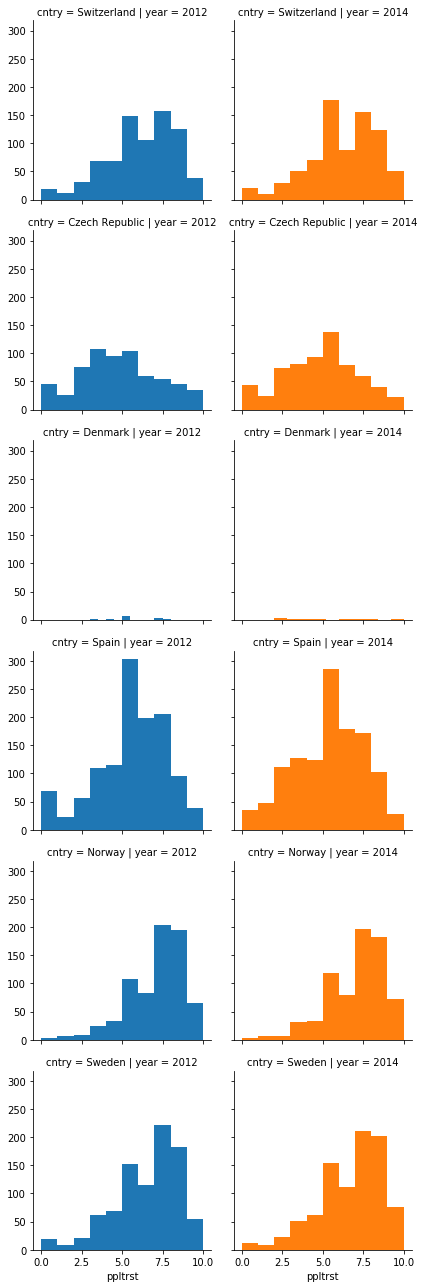

In [6]:
# Plot histograms of trust metric by countries and years:
g = sns.FacetGrid(data, col="year",  row="cntry", hue='year')
g = g.map(plt.hist, "ppltrst")

In [7]:
# Create a list for the countries
countries = data['cntry'].unique().tolist()

# Calculating paired-ttest:
for country in countries :
    print('\n', country)
    print('2012 mean: {0:.2f}'.format(data['ppltrst'][(data['cntry'] == country) & (data['year']==2012)].mean()))
    print('2014 mean: {0:.2f}'.format(data['ppltrst'][(data['cntry'] == country) & (data['year']==2014)].mean()))
    print(stats.ttest_rel(data['ppltrst'][(data['cntry'] == country) & (data['year']==2012)], 
                          data['ppltrst'][(data['cntry'] == country) & (data['year']==2014)],
                          nan_policy='omit'
                         ))


 Switzerland
2012 mean: 5.68
2014 mean: 5.75
Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)

 Czech Republic
2012 mean: 4.36
2014 mean: 4.42
Ttest_relResult(statistic=-0.5001638336887216, pvalue=0.617129268240474)

 Denmark
2012 mean: 5.21
2014 mean: 5.36
Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)

 Spain
2012 mean: 5.11
2014 mean: 4.90
Ttest_relResult(statistic=2.4561906976601646, pvalue=0.014181580725320284)

 Norway
2012 mean: 6.65
2014 mean: 6.60
Ttest_relResult(statistic=0.5073077081124404, pvalue=0.61209257015177)

 Sweden
2012 mean: 6.06
2014 mean: 6.26
Ttest_relResult(statistic=-2.0671082026033982, pvalue=0.03900781670958545)


Looking at the parametric paired t-test with a 5% confident interval result above, the only countries with significant differences between the 2012 and 2014 were ES(Spain) and SE(Sweden):
   * Spain is less trustful by about -0.21 points, and
   * Sweden is more trustful by about +0.20 points.

In [8]:
# Using non-parametric to confirm our findings
for country in countries :
    print('\n', country)
    print('2012 mean: {0:.2f}'.format(data['ppltrst'][(data['cntry'] == country) & (data['year']==2012)].mean()))
    print('2014 mean: {0:.2f}'.format(data['ppltrst'][(data['cntry'] == country) & (data['year']==2014)].mean()))
    print(stats.wilcoxon(data['ppltrst'][(data['cntry'] == country) & (data['year']==2012)], 
                     data['ppltrst'][(data['cntry'] == country) & (data['year']==2014)],
                     zero_method='wilcox'
                    ))


 Switzerland
2012 mean: 5.68
2014 mean: 5.75
WilcoxonResult(statistic=106278.5, pvalue=0.4411286510952477)

 Czech Republic
2012 mean: 4.36
2014 mean: 4.42
WilcoxonResult(statistic=82837.0, pvalue=0.2931891426327379)

 Denmark
2012 mean: 5.21
2014 mean: 5.36
WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)

 Spain
2012 mean: 5.11
2014 mean: 4.90
WilcoxonResult(statistic=243475.5, pvalue=0.005570829650439684)

 Norway
2012 mean: 6.65
2014 mean: 6.60
WilcoxonResult(statistic=85392.0, pvalue=0.6139175669970661)

 Sweden
2012 mean: 6.06
2014 mean: 6.26
WilcoxonResult(statistic=130719.5, pvalue=0.028545290985536906)


/Users/vilandao/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2866: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/Users/vilandao/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2867: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


Non-parametric test also confirm our findings, with Spain is the only country with less trust in 2014 compared to 2012.

### Question 2: Did people become happier from 2012 to 2014? Compute results for each country in the sample.


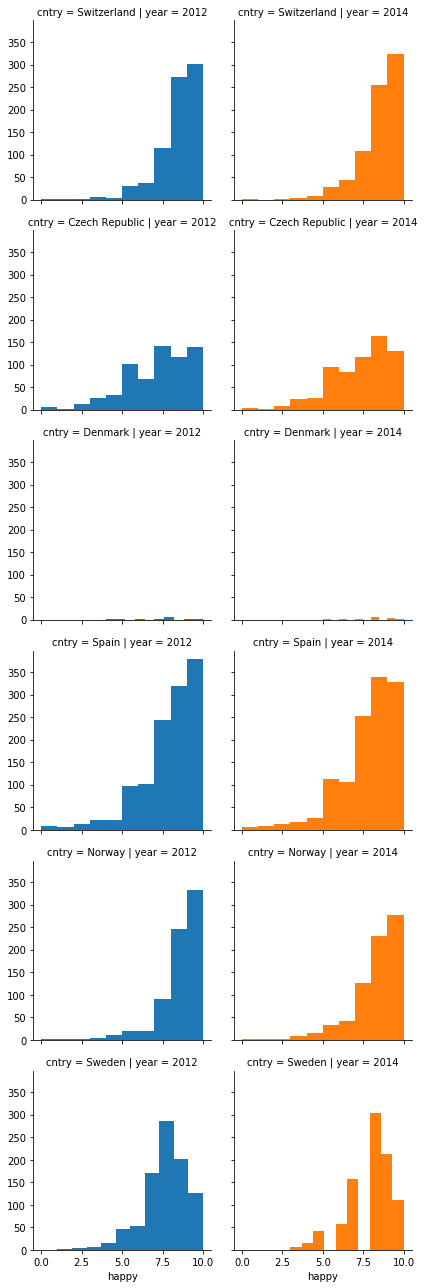

In [9]:
# Plot histograms of happiness metric by countries and years:
g = sns.FacetGrid(data, col="year",  row="cntry", hue='year')
g = g.map(plt.hist, "happy")

In [10]:
# Create new dataframe and drop all missing values:
data2= data.dropna()

# Run normality test to determine what test to use:
tukey = pairwise_tukeyhsd(endog=data2['happy'],      
                          groups=data2['cntry'],   
                          alpha=0.05)         

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Czech Republic,Denmark,0.7359,0.2072,-0.1888,1.6607,False
Czech Republic,Norway,1.2292,0.001,1.0432,1.4153,True
Czech Republic,Spain,0.6481,0.001,0.4791,0.8171,True
Czech Republic,Sweden,1.0634,0.001,0.8851,1.2417,True
Czech Republic,Switzerland,1.2566,0.001,1.0721,1.441,True
Denmark,Norway,0.4933,0.6293,-0.4299,1.4166,False
Denmark,Spain,-0.0878,0.9,-1.0077,0.8322,False
Denmark,Sweden,0.3275,0.9,-0.5943,1.2492,False
Denmark,Switzerland,0.5206,0.5803,-0.4023,1.4435,False
Norway,Spain,-0.5811,0.001,-0.7416,-0.4206,True


By running a tukey test on the people's happiness by country for both years, we can see that the results are mixed, but leaning slightly towards non-normal, so it looks like we'll once again have to use a Wilcoxon signed-rank test.

In [11]:
# Use wilcoxon non-parametric method to inspect the difference:
for country in countries:
    print('\n', country)
    print('2012 median: {0:.2f}'.format(data['happy'][(data['cntry'] == country) & (data['year']==2012)].mean()))
    print('2014 median: {0:.2f}'.format(data['happy'][(data['cntry'] == country) & (data['year']==2014)].mean()))  
    print(stats.wilcoxon(data['happy'][(data['cntry'] == country) & (data['year']==2012)], 
                         data['happy'][(data['cntry'] == country) & (data['year']==2014)],
                         zero_method='wilcox'
                        ))


 Switzerland
2012 median: 8.09
2014 median: 8.12
WilcoxonResult(statistic=92816.5, pvalue=0.8208688161425343)

 Czech Republic
2012 median: 6.77
2014 median: 6.91
WilcoxonResult(statistic=73213.0, pvalue=0.01064243454053068)

 Denmark
2012 median: 7.43
2014 median: 7.86
WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)

 Spain
2012 median: 7.55
2014 median: 7.42
WilcoxonResult(statistic=231958.5, pvalue=0.04923868084306013)

 Norway
2012 median: 8.25
2014 median: 7.92
WilcoxonResult(statistic=67571.5, pvalue=2.7264367804254175e-06)

 Sweden
2012 median: 7.91
2014 median: 7.95
WilcoxonResult(statistic=125481.0, pvalue=0.5136403441005022)


According to non-parametric wilcoxon test with a 5% confident interval result above, the only countries with significant differences between the 2012 and 2014 were ES(Spain) and CZ(Czech Republic):
   * Spain is less happy by -0.13 points, and
   * Czech Republic is happier by 0.14 points
   
### Question 3: Who reported watching more TV in 2012, men or women?

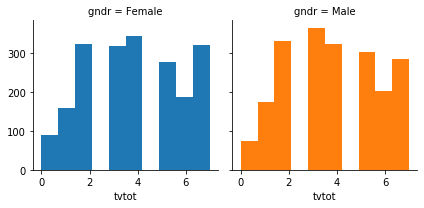

In [12]:
data2012 = data[data['year']==2012]
data2012 = data2012.dropna()

g = sns.FacetGrid(data2012, col="gndr", hue='gndr')
g = g.map(plt.hist, "tvtot")

In [13]:
# Run normality test to determine what test to use
tukey = pairwise_tukeyhsd(endog=data2012['tvtot'],      
                          groups=data2012['gndr'],   
                          alpha=0.05)         

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Female,Male,-0.0461,0.464,-0.1696,0.0773,False


By running a tukey test on the distribution of tv time by gender, it appears as that there's a diffence in the TV watching time. Since this entire experiment is an A/B test, we will use a t-test to compare the two groups.

In [14]:
# Run t-test in order to see if the two groups are significantly different
male = data2012['tvtot'][(data2012['gndr'] == 'Male')]
female = data2012['tvtot'][(data2012['gndr'] == 'Female')]

print('Male mean: {0:.2f}'.format(male.mean()))
print('Female mean: {0:.2f}'.format(female.mean()))  
print(stats.ttest_ind(male, 
                    female,
                    nan_policy='omit'
                    ))

Male mean: 3.86
Female mean: 3.91
Ttest_indResult(statistic=-0.7323552192640558, pvalue=0.4639939646110154)


Based on our statistic tests, it appears that men and women are statistically no different when it comes to time spent on watching TV. As p value is greater than 0.05, we cannot conclude that a significant difference exists.

### Question 4: Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

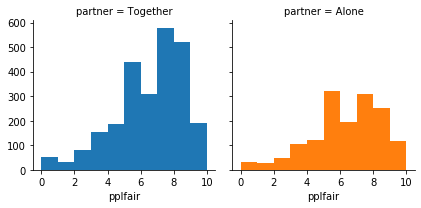

In [15]:
g = sns.FacetGrid(data2012, col="partner", hue='partner')
g = g.map(plt.hist, "pplfair")

In [17]:
# Run normality test to determine what test to use
tukey = pairwise_tukeyhsd(endog=data2012['pplfair'],      
                          groups=data2012['partner'],   
                          alpha=0.05)         

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Alone,Together,0.2084,0.0024,0.0741,0.3427,True


Based on the results of our histogram and tukey test, these distributions are clearly not normal, and since the variables that we want to measure are two independent groups, we will be using a Kruskal-Wallace test.

In [20]:
# Print Mood's Median test result for both domestic statuses
alone_2012 = data2012[data2012['partner']=='Alone']['pplfair']
together_2012 = data2012[data2012['partner']=='Together']['pplfair']
    
kruskal(alone_2012, together_2012, nan_policy='omit')

KruskalResult(statistic=11.887452362061, pvalue=0.0005651336752494688)

Based on the results of our test, it would appear as though there is no significant difference between the two groups, people that live with a partner and people that live alone.

### Question 5: Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a198b4f50>,
      dtype=object)

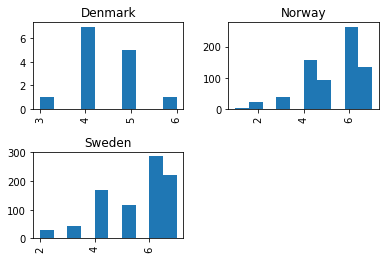

In [21]:
scandinavia = data2.loc[data2['cntry'].isin(['Norway', 'Sweden', 'Denmark'])]

(scandinavia.loc[(scandinavia['year']==2014)]).hist(by=['cntry'], column='sclmeet')

In [22]:
# Run normality test to determine what test to use
tukey = pairwise_tukeyhsd(endog=scandinavia['sclmeet'],      
                          groups=scandinavia['cntry'],   
                          alpha=0.05)         

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Denmark,Norway,0.77,0.0093,0.1554,1.3846,True
Denmark,Sweden,0.8188,0.005,0.2053,1.4324,True
Norway,Sweden,0.0489,0.5649,-0.0644,0.1622,False


Based on the results of our histogram and tukey test, these distributions are clearly not normal, and since the variables that we want to measure are 3 independent groups, we will be using a Kruskal-Wallace test.

In [24]:
stats.kruskal((scandinavia.loc[(scandinavia['year']==2014) & (scandinavia['cntry']=='Denmark')])['sclmeet'],
             (scandinavia.loc[(scandinavia['year']==2014) & (scandinavia['cntry']=='Norway')])['sclmeet'],
             (scandinavia.loc[(scandinavia['year']==2014) & (scandinavia['cntry']=='Sweden')])['sclmeet']
             )

KruskalResult(statistic=13.770182720957441, pvalue=0.0010229226963801021)